In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from lib.misc import generate_coordinates, haversine_distance

# Test for the prior probability
We want to optimize the $P(H^0_{ij})$ prior probability of a link between two locations

In [ ]:


def find_edge_probability(pval):
    '''
        Return
            p0 (float):     minimum posterior probability of the null hypothesis
    '''

    def find_bayes_factor(pval):
        if pval < math.e**(-1):
            B = -math.e*pval*math.log(abs(pval))
        else:
            B = 1
        return B

    prior = 0.99 # Global prior probability for the null hypothesis
    B = find_bayes_factor(pval)
    p0 = 1-(1+((B)*(prior)/(1-prior))**(-1))**(-1)

    return p0

In [ ]:
p0 = find_edge_probability(0.0000001)
print(p0)

coords_dict, lons, lats = generate_coordinates(sizegrid=5)


for node, coords in coords_dict.items():
    print(node,coords)
    



In [ ]:
p0list

(0.0, 0.2)

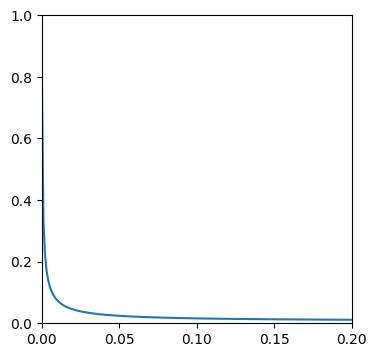

In [47]:
plist = np.arange(0.0001,1,0.001)
p0list = [find_edge_probability(item) for item in plist]

fig, ax = plt.subplots(figsize=[4,4])
ax.plot(plist,p0list)
ax.set_ylim([0,1])
ax.set_xlim([0,0.2])

## Granger Causality Test


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
import pandas as pd
import math
import random

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
data = sm.datasets.sunspots.load_pandas().data['SUNACTIVITY']

In [ ]:
res = AutoReg(data, lags = [1, 11, 12]).fit()
print(out.format(res.aic, res.hqic, res.bic))

In [ ]:
def test_granger(x,y,maxlag=2):
    ''' Granger causality from x to y'''
    res = grangercausalitytests(np.array([y,x]).T,maxlag=maxlag)
    print(res)

In [ ]:
N = 1000
x = np.random.rand(N)
y = np.zeros(N)
lag = 10
y[lag:] = x[0:N-lag] + 0.2*np.random.random(N-lag)
%time test_granger(x,y,maxlag=[6])

### Analisi Fuzzy networks

In [ ]:
### Test fuzzy network
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def create_network(adj_fuzzy):
    random_matrix = np.random.rand(*adj_fuzzy.shape)
    adj = (random_matrix < adj_fuzzy).astype(int)
    G = ig.Graph.Adjacency(adj,mode="upper",diag=False)
    return G

def compute_clustering_coefficient(adj_fuzzy,mode="zero",ntrial = 10):
    list = []
    for i in range(ntrial):
        G = create_network(adj_fuzzy)
        list.append(G.transitivity_undirected(mode=mode))
    return list

# Test Manlio
Creiamo matrici random, simmetriche, e sampliamo quelle

In [ ]:
import numpy as np
import networkx as nx
import igraph as ig
import math

In [ ]:
compute_clustering_coefficient(A,mode="zero")

In [ ]:
plt.imshow(A)
plt.colorbar()

In [ ]:
N = 200
A = np.random.rand(N,N)
A = (A + A.T)/2

# A = np.tril(A) + np.triu(A.T, 1)

np.fill_diagonal(A,0)

In [ ]:
def create_network_nx(adj_fuzzy):
    random_matrix = np.random.rand(*adj_fuzzy.shape)
    adj = (random_matrix < adj_fuzzy).astype(int)
    adj = (adj+adj.T)/2
    G = nx.Graph(adj)
    return G

def create_network_ig(adj_fuzzy):
    random_matrix = np.random.rand(*adj_fuzzy.shape)
    adj = (random_matrix < adj_fuzzy).astype(int)
    adj = (adj+adj.T)/2

    G = ig.Graph.Adjacency(adj,mode="undirected",diag=True)
    return G


In [ ]:


G = create_network_nx(A)
print(f"{nx.transitivity(G)}")


G = create_network_ig(A)
G.transitivity_undirected()

In [ ]:
# random_matrix = np.random.rand(*A.shape)
# adj = (random_matrix < A).astype(int)
# adj = np.array([[0,1,0,1],[1,0,0,1],[0,0,0,1],[1,1,1,0]])
adj = np.array([[0,1,0,0,1],
                [1,0,0,0,1],
                [0,0,0,0,1],
                [0,0,0,0,1],
                [1,1,1,1,0]
                ])


adj = np.array([[0,1,0,1],
                [1,0,0,1],
                [0,0,0,1],
                [1,1,1,0]
                ])
# adj = np.triu(adj,0)
# adj = (adj + adj.T)

In [ ]:
G = nx.Graph(adj)
print(f"{nx.transitivity(G)}")
sum(np.diag(np.linalg.matrix_power(adj, 3)))/math.comb(4,3)

In [ ]:

adj